# House price prediction

## Using Keras Sequential API

Importing data and splitting into train, validation and test datasets

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

x_train_full, x_test , y_train_full, y_test = train_test_split(housing.data, housing.target,random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)
x_train.shape

(11610, 8)

Model development and testing

In [2]:
import tensorflow as tf

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=x_train.shape[1:])
norm_layer.adapt(x_train)
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer,metrics=["RootMeanSquaredError"])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test, rmse_test = model.evaluate(x_test, y_test)

2024-07-05 10:08:24.949544: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 10:08:26.321529: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 10:08:31.141090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-05 10:09:00.220396: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/james/HDD/OneDrive/Cloud/tutorials/.conda/lib/python3.11/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as t

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 1.3460 - loss: 1.9309 - val_RootMeanSquaredError: 0.6727 - val_loss: 0.4526
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6719 - loss: 0.4518 - val_RootMeanSquaredError: 0.6271 - val_loss: 0.3932
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - RootMeanSquaredError: 0.6329 - loss: 0.4008 - val_RootMeanSquaredError: 0.6027 - val_loss: 0.3633
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - RootMeanSquaredError: 0.6097 - loss: 0.3719 - val_RootMeanSquaredError: 0.5898 - val_loss: 0.3479
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5956 - loss: 0.3549 - val_RootMeanSquaredError: 0.5790 - val_loss: 0.3352
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5831 - loss: 0.3401 - val_RootMeanSquaredError: 0.5729 - val_loss: 0.3282
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5748 -

In [3]:
y_pred = model.predict(x_test)
y_pred

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


array([[0.51146364],
       [1.2337284 ],
       [4.132322  ],
       ...,
       [1.5953077 ],
       [2.4654605 ],
       [4.1630793 ]], dtype=float32)

Saving the model

In [4]:
model.save("my_keras_model.keras")

Loading the model

In [5]:
model_new = tf.keras.models.load_model("my_keras_model.keras")
y_pred = model_new.predict(x_test)
y_pred

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


array([[0.51146364],
       [1.2337284 ],
       [4.132322  ],
       ...,
       [1.5953077 ],
       [2.4654605 ],
       [4.1630793 ]], dtype=float32)

## Using Keras Functional API

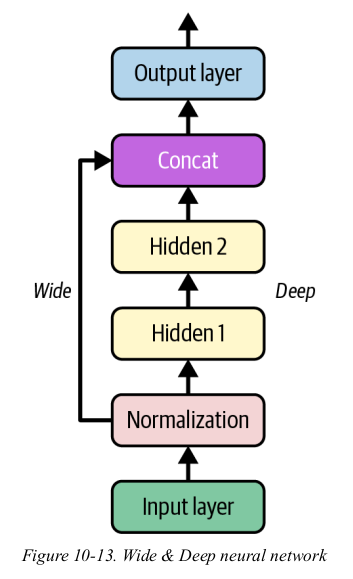

In [15]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization()
hidden1_layer = tf.keras.layers.Dense(30, activation="relu")
hidden2_layer = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
normalized = norm_layer(input_)
hidden1 = hidden1_layer(normalized)
hidden2 = hidden2_layer(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 8)         │         17 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        270 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30)        │        930 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 38)        │          0 │ normalization_2[… │
│ (Concatenate)       │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         39 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [17]:
model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5826 - loss: 0.3396 - val_RootMeanSquaredError: 0.5750 - val_loss: 0.3306
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5784 - loss: 0.3347 - val_RootMeanSquaredError: 0.5759 - val_loss: 0.3317
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5745 - loss: 0.3302 - val_RootMeanSquaredError: 0.5682 - val_loss: 0.3228
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5684 - loss: 0.3233 - val_RootMeanSquaredError: 0.5701 - val_loss: 0.3250
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5669 - loss: 0.3215 - val_RootMeanSquaredError: 0.5665 - val_loss: 0.3210
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5627 - loss: 0.3168 - val_RootMeanSquaredError: 0.5634 - val_loss: 0.3175
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5593 - los

array([[0.46278787],
       [1.0583947 ],
       [4.2976403 ],
       ...,
       [1.6931404 ],
       [2.4785132 ],
       [4.419209  ]], dtype=float32)

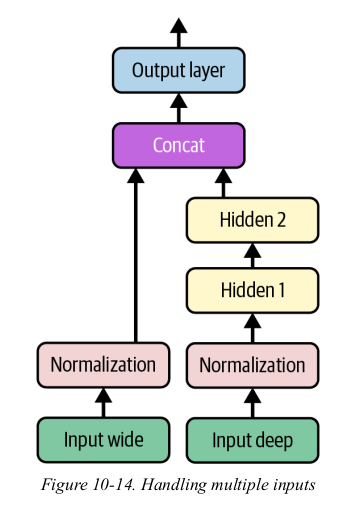

Sending few input features through the deep network and sending other features directly to concate layers